# Battle of the Neighborhoods – Hospital

#### Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from geopy.geocoders import Nominatim 
from IPython.display import Image 
from IPython.core.display import HTML
import requests
import folium
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from IPython.display import Image

#### Importing the data from csv file into a Dataframe.

In [2]:
df = pd.read_csv("./nin-health-facilities.csv", sep =",", encoding = 'ISO-8859-1')

In [3]:
df.head()

,SrNo,Health Facility Name,Address,street,landmark,locality,pincode,landline_number,latitude,longitude,altitude,Facility Type,State_Name,District_Name,Taluka_Name,Block_Name
0,1,Chunawadh,BIJALI BOARD K SAMANEY,GALII NO 1,NaN,NaN,335022.0,1542763669,29.08210684,73.7273276,0,Community Health Center,Rajasthan,Ganganagar,Ganganagar,Ganganagar
1,2,11 G CHOOTI,BUS STAND K PASS,GALII NO 1,NaN,Village 11 G,335022.0,1542763669,29.859938,73.673635,0,SubCentre,Rajasthan,Ganganagar,Ganganagar,Ganganagar
2,3,27GG,NEAR GURDWARAA,GALII NO 1,NaN,NaN,335022.0,1542763669,29.84301,73.688201,0,SubCentre,Rajasthan,Ganganagar,Ganganagar,Ganganagar
3,4,CHUNAWADH KOTHI,NEAR GOVT SCHOOL K PASS M.,NAHAR K NAJDHIK,NaN,NaN,335022.0,1542763669,29.845661,73.761024,0,Others,Rajasthan,Ganganagar,Ganganagar,Ganganagar
4,5,SAGARWALAA,NEAR WATER WORKAS,STREET NO 1,NaN,NaN,335022.0,1542763669,29.787177,73.727601,0,SubCentre,Rajasthan,Ganganagar,Ganganagar,Ganganagar


Filtering the dataframe to get data for Maharashtra

In [4]:
state_filter = df['State_Name'].str.contains('Maharashtra')

In [5]:
df[state_filter].head()

,SrNo,Health Facility Name,Address,street,landmark,locality,pincode,landline_number,latitude,longitude,altitude,Facility Type,State_Name,District_Name,Taluka_Name,Block_Name
673,674,PHC Astgaon,Astgaon,Gavthan,Near New English School,Rahata,423107.0,2423245585,19.671119,74.50299,0,Primary Health Centre,Maharashtra,Ahmadnagar,Rahta,Rahata
674,675,PHC Dadh Bk,Dadh Bk,Ashwi Road,Near Mahatma Phule Jr. Collage,NaN,413714.0,2422270031,19.524707,74.418898,0,Primary Health Centre,Maharashtra,Ahmadnagar,Rahta,Rahata
675,676,PHC Dorhale,Primary Health Center,Dorhale,Near Jape Vasti,Pohegaon Road,423604.0,NaN,19.761988,74.426923,0,Primary Health Centre,Maharashtra,Ahmadnagar,Rahta,Rahata
676,677,PHC Kolhar Bk,Primary Health Center,Gavthan,Bhagwati Mata Mandir Road,NaN,413710.0,2422250259,19.539133,74.534011,0,Primary Health Centre,Maharashtra,Ahmadnagar,Rahta,Rahata
677,678,PHC Savalivihir Bk,Primary Health Center,Gavthan,Rui Road,Near High School,423109.0,2423251210,19.802984,74.47027,0,Primary Health Centre,Maharashtra,Ahmadnagar,Rahta,Rahata


In [6]:
df = df[state_filter]

Filtering the dataframe to get data of Mumbai

In [7]:
district_filter = df['District_Name'].str.contains('Mumbai')

In [8]:
df = df[district_filter]
df.head()

,SrNo,Health Facility Name,Address,street,landmark,locality,pincode,landline_number,latitude,longitude,altitude,Facility Type,State_Name,District_Name,Taluka_Name,Block_Name
2352,2353,Ganesh Nagar Health Post,"Laxmi Baug,","Rajaram Bane Marg,Ghatkopar bus depot",Vithal Mandir,Ghatkopar (E) - 75,400075.0,022-25001060,19.0796,72.907,0,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,\N,\N
2360,2361,Parsiwadi Dispensary,"Near Municipal School,",Ganesh Maidan,Parsiwadi,Ghatkopar West,400086.0,NaN,19.0912,72.8991,0,Dispensaries,Maharashtra,Mumbai (Suburban) *,\N,\N
2362,2363,Rajawadi Municipal School Health Post,Danji Devashi Mun School Bldg.,Patel Chowk,Oppsite Jain Mandir,Ghatkopar (E) - 75,400077.0,NaN,19.0794,72.901,0,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,\N,\N
2364,2365,Mulund Maternity Home HP,"Smt. Jessabai Dossa Chanchani Mun. Mat, Home B...","Pach Rasta , Mulund (W) - 80",Opp.Kirti Mahal,MULUND WEST,400080.0,022-25913280,19.1746,72.9431,0,Maternity Home,Maharashtra,Mumbai (Suburban) *,\N,\N
2365,2366,Mulund Colony HP,"Mulund Colony Mun. Disp.,","Juhelal Marg,",Jaibharat College,"Mulund (W), Mumbai ??ª?? 80",400080.0,022-25652807,19.1697,72.9357,0,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,\N,\N


Dropping unproductive columns from the dataset

In [9]:
df = df.drop(['altitude', 'Taluka_Name', 'Block_Name'], axis = 1)

In [10]:
df

,SrNo,Health Facility Name,Address,street,landmark,locality,pincode,landline_number,latitude,longitude,Facility Type,State_Name,District_Name
2352,2353,Ganesh Nagar Health Post,"Laxmi Baug,","Rajaram Bane Marg,Ghatkopar bus depot",Vithal Mandir,Ghatkopar (E) - 75,400075.0,022-25001060,19.0796,72.907,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
2360,2361,Parsiwadi Dispensary,"Near Municipal School,",Ganesh Maidan,Parsiwadi,Ghatkopar West,400086.0,NaN,19.0912,72.8991,Dispensaries,Maharashtra,Mumbai (Suburban) *
2362,2363,Rajawadi Municipal School Health Post,Danji Devashi Mun School Bldg.,Patel Chowk,Oppsite Jain Mandir,Ghatkopar (E) - 75,400077.0,NaN,19.0794,72.901,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
2364,2365,Mulund Maternity Home HP,"Smt. Jessabai Dossa Chanchani Mun. Mat, Home B...","Pach Rasta , Mulund (W) - 80",Opp.Kirti Mahal,MULUND WEST,400080.0,022-25913280,19.1746,72.9431,Maternity Home,Maharashtra,Mumbai (Suburban) *
2365,2366,Mulund Colony HP,"Mulund Colony Mun. Disp.,","Juhelal Marg,",Jaibharat College,"Mulund (W), Mumbai ??ª?? 80",400080.0,022-25652807,19.1697,72.9357,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
2367,2368,Veer Savarkar HP,V.D.Sawarkar Mun.Gen. Hospital,"L.T.Road,",V.D.Sawarkar Mun.Gen. Hospital,Mulund East Mumbai 81,400081.0,022-21637362,19.1755,72.972,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
2368,2369,DDU Marg HP,"Dumping road,",near Mulund Check naka Bus Depot,Opp. croma,Mulund (W)-80.,400080.0,NaN,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
2370,2371,Nanepada Health Post,"Nanepada Village,","Near Sachin Society,",SACHIN SOCIETY,Mulund (E) - 81,400081.0,NaN,19.16501,72.9521,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
2371,2372,DDU HP - 2,"Nanepada Village,","Near Sachin Society,",Sachin Society,Mulund (E) - 81,400081.0,022-2162231,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
2372,2373,M.T.Agarwal Hospital,"Mun. Market Galli, Near Tridev Apts.",Opp. R.C. Company Bhakti Marg,Opp.R.C.Company,Mulund (W) - 80,400080.0,022-25692316,19.1779,72.9462,Sub-District Hospital,Maharashtra,Mumbai (Suburban) *


In [11]:
df = df.reset_index()
df

,index,SrNo,Health Facility Name,Address,street,landmark,locality,pincode,landline_number,latitude,longitude,Facility Type,State_Name,District_Name
0,2352,2353,Ganesh Nagar Health Post,"Laxmi Baug,","Rajaram Bane Marg,Ghatkopar bus depot",Vithal Mandir,Ghatkopar (E) - 75,400075.0,022-25001060,19.0796,72.907,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
1,2360,2361,Parsiwadi Dispensary,"Near Municipal School,",Ganesh Maidan,Parsiwadi,Ghatkopar West,400086.0,NaN,19.0912,72.8991,Dispensaries,Maharashtra,Mumbai (Suburban) *
2,2362,2363,Rajawadi Municipal School Health Post,Danji Devashi Mun School Bldg.,Patel Chowk,Oppsite Jain Mandir,Ghatkopar (E) - 75,400077.0,NaN,19.0794,72.901,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
3,2364,2365,Mulund Maternity Home HP,"Smt. Jessabai Dossa Chanchani Mun. Mat, Home B...","Pach Rasta , Mulund (W) - 80",Opp.Kirti Mahal,MULUND WEST,400080.0,022-25913280,19.1746,72.9431,Maternity Home,Maharashtra,Mumbai (Suburban) *
4,2365,2366,Mulund Colony HP,"Mulund Colony Mun. Disp.,","Juhelal Marg,",Jaibharat College,"Mulund (W), Mumbai ??ª?? 80",400080.0,022-25652807,19.1697,72.9357,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
5,2367,2368,Veer Savarkar HP,V.D.Sawarkar Mun.Gen. Hospital,"L.T.Road,",V.D.Sawarkar Mun.Gen. Hospital,Mulund East Mumbai 81,400081.0,022-21637362,19.1755,72.972,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
6,2368,2369,DDU Marg HP,"Dumping road,",near Mulund Check naka Bus Depot,Opp. croma,Mulund (W)-80.,400080.0,NaN,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
7,2370,2371,Nanepada Health Post,"Nanepada Village,","Near Sachin Society,",SACHIN SOCIETY,Mulund (E) - 81,400081.0,NaN,19.16501,72.9521,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
8,2371,2372,DDU HP - 2,"Nanepada Village,","Near Sachin Society,",Sachin Society,Mulund (E) - 81,400081.0,022-2162231,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
9,2372,2373,M.T.Agarwal Hospital,"Mun. Market Galli, Near Tridev Apts.",Opp. R.C. Company Bhakti Marg,Opp.R.C.Company,Mulund (W) - 80,400080.0,022-25692316,19.1779,72.9462,Sub-District Hospital,Maharashtra,Mumbai (Suburban) *


In [12]:
df = df.drop(['index'], axis=1)
df

,SrNo,Health Facility Name,Address,street,landmark,locality,pincode,landline_number,latitude,longitude,Facility Type,State_Name,District_Name
0,2353,Ganesh Nagar Health Post,"Laxmi Baug,","Rajaram Bane Marg,Ghatkopar bus depot",Vithal Mandir,Ghatkopar (E) - 75,400075.0,022-25001060,19.0796,72.907,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
1,2361,Parsiwadi Dispensary,"Near Municipal School,",Ganesh Maidan,Parsiwadi,Ghatkopar West,400086.0,NaN,19.0912,72.8991,Dispensaries,Maharashtra,Mumbai (Suburban) *
2,2363,Rajawadi Municipal School Health Post,Danji Devashi Mun School Bldg.,Patel Chowk,Oppsite Jain Mandir,Ghatkopar (E) - 75,400077.0,NaN,19.0794,72.901,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
3,2365,Mulund Maternity Home HP,"Smt. Jessabai Dossa Chanchani Mun. Mat, Home B...","Pach Rasta , Mulund (W) - 80",Opp.Kirti Mahal,MULUND WEST,400080.0,022-25913280,19.1746,72.9431,Maternity Home,Maharashtra,Mumbai (Suburban) *
4,2366,Mulund Colony HP,"Mulund Colony Mun. Disp.,","Juhelal Marg,",Jaibharat College,"Mulund (W), Mumbai ??ª?? 80",400080.0,022-25652807,19.1697,72.9357,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
5,2368,Veer Savarkar HP,V.D.Sawarkar Mun.Gen. Hospital,"L.T.Road,",V.D.Sawarkar Mun.Gen. Hospital,Mulund East Mumbai 81,400081.0,022-21637362,19.1755,72.972,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
6,2369,DDU Marg HP,"Dumping road,",near Mulund Check naka Bus Depot,Opp. croma,Mulund (W)-80.,400080.0,NaN,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
7,2371,Nanepada Health Post,"Nanepada Village,","Near Sachin Society,",SACHIN SOCIETY,Mulund (E) - 81,400081.0,NaN,19.16501,72.9521,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
8,2372,DDU HP - 2,"Nanepada Village,","Near Sachin Society,",Sachin Society,Mulund (E) - 81,400081.0,022-2162231,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *
9,2373,M.T.Agarwal Hospital,"Mun. Market Galli, Near Tridev Apts.",Opp. R.C. Company Bhakti Marg,Opp.R.C.Company,Mulund (W) - 80,400080.0,022-25692316,19.1779,72.9462,Sub-District Hospital,Maharashtra,Mumbai (Suburban) *


#### Extracting locality wise population data of Mumbai from a webpage.

In [13]:
temp_table = pd.read_html('http://www.indiaonlinepages.com/population/mumbai-population.html')
df2 = pd.DataFrame(data = temp_table[3])
df2

,0,1,2,3
0,Ward,Area,Population,Density per Square Kilometer
1,ISLAND CITY DISTRICT,3338031,43447,NaN
2,A,Colaba,210847,16868
3,B,Sanhurst Road,140633,56936
4,C,Marine Lines,202922,114001
5,D,Grant Road,382841,57744
6,E,Byculla,440335,59505
7,F South,Parel,396122,28294
8,F North,Matunga,524393,40400
9,G South,Elphinstone,457931,45793


Cleaning and restructuring the dataframe

In [14]:
df2 = df2.rename(df2.iloc[0], axis = 1)
df2 = df2.drop(index=0)
df2

,Ward,Area,Population,Density per Square Kilometer
1,ISLAND CITY DISTRICT,3338031,43447,NaN
2,A,Colaba,210847,16868
3,B,Sanhurst Road,140633,56936
4,C,Marine Lines,202922,114001
5,D,Grant Road,382841,57744
6,E,Byculla,440335,59505
7,F South,Parel,396122,28294
8,F North,Matunga,524393,40400
9,G South,Elphinstone,457931,45793
10,G North,Dadar/Plaza,582007,64168


In [15]:
df2 = df2.drop(index = [1, 11, 27, 28, 29, 30, 31, 32, 33, 34])

In [16]:
df2

,Ward,Area,Population,Density per Square Kilometer
2,A,Colaba,210847,16868
3,B,Sanhurst Road,140633,56936
4,C,Marine Lines,202922,114001
5,D,Grant Road,382841,57744
6,E,Byculla,440335,59505
7,F South,Parel,396122,28294
8,F North,Matunga,524393,40400
9,G South,Elphinstone,457931,45793
10,G North,Dadar/Plaza,582007,64168
12,H East,Khar/Santacruz,580835,42929


In [17]:
df2 = df2.reset_index()
df2

,index,Ward,Area,Population,Density per Square Kilometer
0,2,A,Colaba,210847,16868
1,3,B,Sanhurst Road,140633,56936
2,4,C,Marine Lines,202922,114001
3,5,D,Grant Road,382841,57744
4,6,E,Byculla,440335,59505
5,7,F South,Parel,396122,28294
6,8,F North,Matunga,524393,40400
7,9,G South,Elphinstone,457931,45793
8,10,G North,Dadar/Plaza,582007,64168
9,12,H East,Khar/Santacruz,580835,42929


Dropping unproductive columns

In [18]:
df2 = df2.drop(['index', 'Ward'], axis = 1)
df2

,Area,Population,Density per Square Kilometer
0,Colaba,210847,16868
1,Sanhurst Road,140633,56936
2,Marine Lines,202922,114001
3,Grant Road,382841,57744
4,Byculla,440335,59505
5,Parel,396122,28294
6,Matunga,524393,40400
7,Elphinstone,457931,45793
8,Dadar/Plaza,582007,64168
9,Khar/Santacruz,580835,42929


In [19]:
mumbai_locality_population = df2
mumbai_locality_population

,Area,Population,Density per Square Kilometer
0,Colaba,210847,16868
1,Sanhurst Road,140633,56936
2,Marine Lines,202922,114001
3,Grant Road,382841,57744
4,Byculla,440335,59505
5,Parel,396122,28294
6,Matunga,524393,40400
7,Elphinstone,457931,45793
8,Dadar/Plaza,582007,64168
9,Khar/Santacruz,580835,42929


Initializing foursquare api credentials

In [20]:
CLIENT_ID = 'XXXX' # Foursquare ID
CLIENT_SECRET = 'XXXX' # Foursquare Secret
VERSION = '20190807'
LIMIT = 30

Retrieving coordinates of each locality

In [21]:
latitude_list=[]
longitude_list = []
filter_list = []
for area in mumbai_locality_population['Area']:
    try:
        address = area+', Mumbai, Maharashtra, India'
        print(address)
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(address)
        lat = location.latitude
        longitude = location.longitude
        latitude_list.append(lat)
        longitude_list.append(longitude)
        print(latitude_list)
        print(longitude_list)
    except:
        filter_list.append(area)
        continue

Colaba, Mumbai, Maharashtra, India
[18.915091]
[72.8259691]
Sanhurst Road, Mumbai, Maharashtra, India
Marine Lines, Mumbai, Maharashtra, India
[18.915091, 18.9456701]
[72.8259691, 72.823781]
Grant Road, Mumbai, Maharashtra, India
[18.915091, 18.9456701, 18.9644472]
[72.8259691, 72.823781, 72.8135727]
Byculla, Mumbai, Maharashtra, India
[18.915091, 18.9456701, 18.9644472, 18.9766219]
[72.8259691, 72.823781, 72.8135727, 72.8327936]
Parel, Mumbai, Maharashtra, India
[18.915091, 18.9456701, 18.9644472, 18.9766219, 19.0094817]
[72.8259691, 72.823781, 72.8135727, 72.8327936, 72.8376614]
Matunga, Mumbai, Maharashtra, India
[18.915091, 18.9456701, 18.9644472, 18.9766219, 19.0094817, 19.0274356]
[72.8259691, 72.823781, 72.8135727, 72.8327936, 72.8376614, 72.8501467]
Elphinstone, Mumbai, Maharashtra, India
[18.915091, 18.9456701, 18.9644472, 18.9766219, 19.0094817, 19.0274356, 18.9479384]
[72.8259691, 72.823781, 72.8135727, 72.8327936, 72.8376614, 72.8501467, 72.8406448]
Dadar/Plaza, Mumbai, Mah

In [22]:
len(latitude_list)

21

In [23]:
len(mumbai_locality_population['Area'].tolist())

24

In [24]:
print(filter_list)

['Sanhurst Road', 'Kandivalli', 'Dahiser']


Removing localities for which location coordinates were not found.

In [25]:
mumbai_locality_population = mumbai_locality_population[~mumbai_locality_population.isin(filter_list)]
mumbai_locality_population = mumbai_locality_population.dropna(how='any')
mumbai_locality_population = mumbai_locality_population.reset_index()
mumbai_locality_population = mumbai_locality_population.drop(['index'], axis = 1)
mumbai_locality_population

,Area,Population,Density per Square Kilometer
0,Colaba,210847,16868
1,Marine Lines,202922,114001
2,Grant Road,382841,57744
3,Byculla,440335,59505
4,Parel,396122,28294
5,Matunga,524393,40400
6,Elphinstone,457931,45793
7,Dadar/Plaza,582007,64168
8,Khar/Santacruz,580835,42929
9,Bandra,337391,29211


Concatenating location coordinates with our dataframe

In [26]:
location = pd.DataFrame({'Latitude': latitude_list, 'Longitude': longitude_list})
mumbai_locality_population = pd.concat([mumbai_locality_population, location], join='inner', axis=1)

In [27]:
mumbai_locality_population

,Area,Population,Density per Square Kilometer,Latitude,Longitude
0,Colaba,210847,16868,18.915091,72.825969
1,Marine Lines,202922,114001,18.945670,72.823781
2,Grant Road,382841,57744,18.964447,72.813573
3,Byculla,440335,59505,18.976622,72.832794
4,Parel,396122,28294,19.009482,72.837661
5,Matunga,524393,40400,19.027436,72.850147
6,Elphinstone,457931,45793,18.947938,72.840645
7,Dadar/Plaza,582007,64168,19.019282,72.842876
8,Khar/Santacruz,580835,42929,19.073628,72.834073
9,Bandra,337391,29211,19.054979,72.840220


In [28]:
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode('Mumbai, Maharashtra')
mumbai_lat = location.latitude
mumbai_long = location.longitude
print(mumbai_lat, mumbai_long)    

18.9387711 72.8353355


#### Plotting map of Mumbai

In [29]:
init_mumbai_map = folium.Map(location = [mumbai_lat, mumbai_long], zoom_start=10)
init_mumbai_map

Displaying screenshot of the map, as map might not be displayed on GitHub

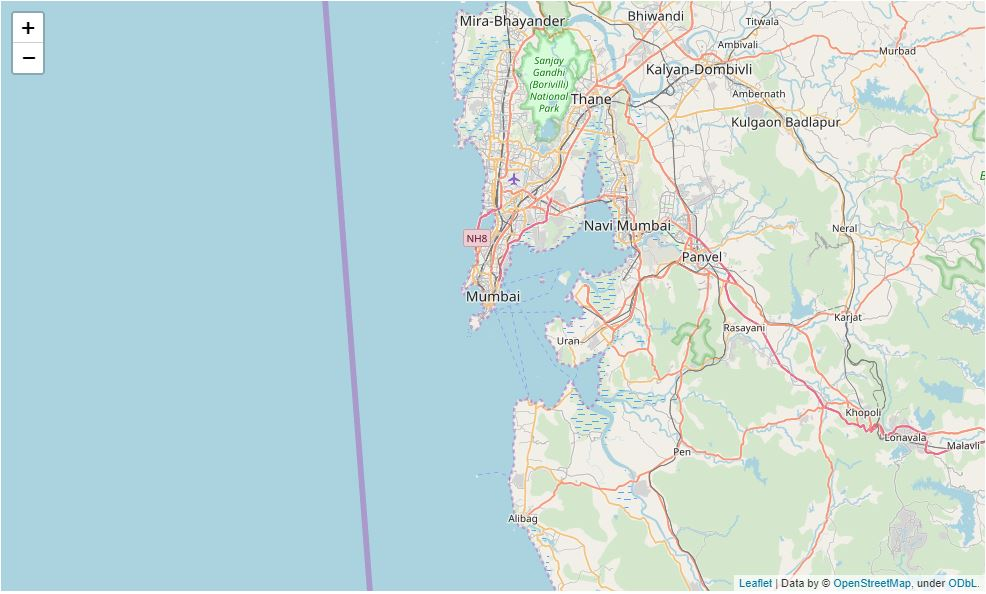

In [30]:
Image(filename='C:/Users/akash/Desktop/GitUpdate/Mumbai_map.jpg')

#### Plotting Mumbai localities

In [31]:
for lat, lng, label in zip(mumbai_locality_population.Latitude, mumbai_locality_population.Longitude, mumbai_locality_population.Area):
    print(lat, lng, label)
    folium.CircleMarker(
        location=[lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=1
        ).add_to(init_mumbai_map)

18.915091 72.8259691 Colaba
18.9456701 72.823781 Marine Lines
18.9644472 72.8135727 Grant Road
18.9766219 72.8327936 Byculla
19.0094817 72.8376614 Parel
19.0274356 72.8501467 Matunga
18.9479384 72.8406448 Elphinstone
19.019282 72.8428757 Dadar/Plaza
19.0736276 72.8340726 Khar/Santacruz
19.0549792 72.8402203 Bandra
19.1158835 72.854202 Andheri (East)
19.1172495 72.833968 Andheri (West)
19.0652797 72.8793805 Kurla
19.0460658 72.8954733 Chembur East
19.0571098 72.8993875 Chembur West
19.0859539 72.9082381 Ghatkopar
19.1647526 72.8500176 Goregaon
19.1867193 72.8485884 Malad
19.2294561 72.8479905 Borivali West
19.1438684 72.9384327 Bhandup
19.1722904 72.9564695 Mulund


In [32]:
init_mumbai_map

Displaying screenshot of the map, as map might not be displayed on GitHub

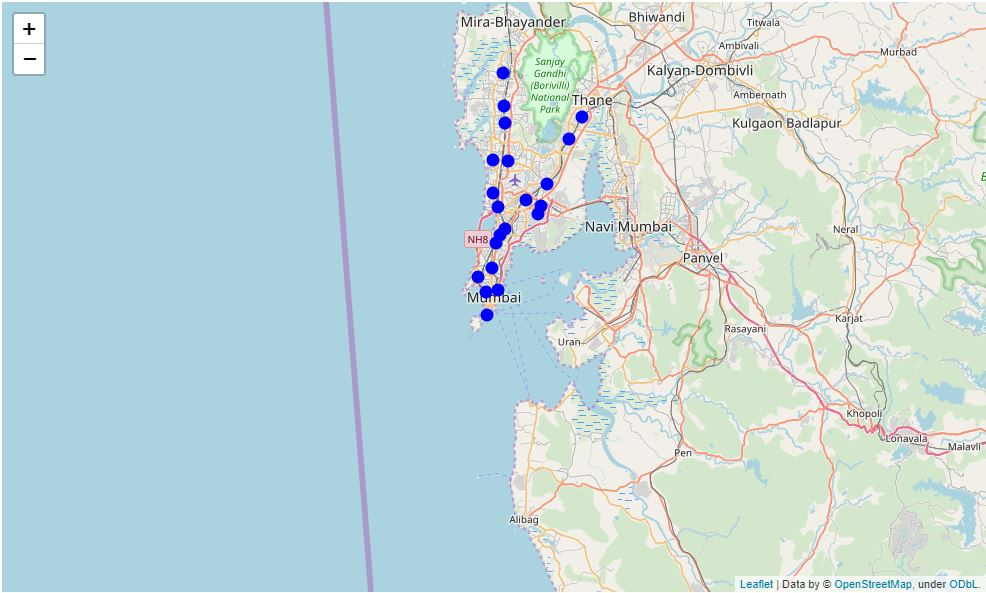

In [33]:
Image(filename='C:/Users/akash/Desktop/GitUpdate/Mumbai_localities_map.jpg')

Initialising centriods for KMeans clusters.

In [34]:
centroids = []
for lat, long in zip(mumbai_locality_population.Latitude, mumbai_locality_population.Longitude):
    centroids.append([lat, long])
print(centroids)
print(np.array(centroids).shape)
cents = np.array(centroids)
k_means = KMeans(init=cents, n_clusters=len(centroids))


[[18.915091, 72.8259691], [18.9456701, 72.823781], [18.9644472, 72.8135727], [18.9766219, 72.8327936], [19.0094817, 72.8376614], [19.0274356, 72.8501467], [18.9479384, 72.8406448], [19.019282, 72.8428757], [19.0736276, 72.8340726], [19.0549792, 72.8402203], [19.1158835, 72.854202], [19.1172495, 72.833968], [19.0652797, 72.8793805], [19.0460658, 72.8954733], [19.0571098, 72.8993875], [19.0859539, 72.9082381], [19.1647526, 72.8500176], [19.1867193, 72.8485884], [19.2294561, 72.8479905], [19.1438684, 72.9384327], [19.1722904, 72.9564695]]
(21, 2)


#### Classfying the data using K Means algorithm

In [35]:
temp = []
for lat, long in zip(df.latitude, df.longitude):
    temp.append([lat, long])
govt_hospitals = np.array(temp)
k_means.fit(govt_hospitals, y=mumbai_locality_population.Area)

C:\Users\akash\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True,
    init=array([[18.91509, 72.82597],
       [18.94567, 72.82378],
       [18.96445, 72.81357],
       [18.97662, 72.83279],
       [19.00948, 72.83766],
       [19.02744, 72.85015],
       [18.94794, 72.84064],
       [19.01928, 72.84288],
       [19.07363, 72.83407],
       [19.05498, 72.84022],
     ..., 72.84859],
       [19.22946, 72.84799],
       [19.14387, 72.93843],
       [19.17229, 72.95647]]),
    max_iter=300, n_clusters=21, n_init=10, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

In [36]:
lbl = k_means.labels_
print(lbl)
print(len(lbl))

[15 15 15 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 15 15 15 12 15 15
  3  3  3  2  6 15 15 12  7 14 14 14 14 13 14 13 14 14 14 14 14 14 15 15
 15 12 12 12 15 19 19 15 13  2  8  7  5  5 17 17  2 17 16 16 17  5 10  8
  3 17 16  3 10  1 16  6  6 10  9 11  3 10  1  4 17  2  8 17 17 17 10  1
 17  4 11  4  7 17 16  6 16 17  7 10 16  7 10 10  5  8 17  9 10 10 10  4
  5 17 17  7 17 10  9  5 16  5  7 16 16 17 15  1  4  7 16  9  4  3  5 10
  3 10 12  7 12  5 17 17  8 17 10 17 17 16  5 17  7  6 16 16 17  4 17 10
 10 10 18 17 12  2 16  7 16 16  3  8  2 12  4  8 17 17  1 10 10 17 17  5
 10 15  3  0  8  3  8  8 16  7  5  4 10  9 10  9 11 17  8  4  9 17 16 20
  9  2 16  5  5 16 12]
223


#### Assigning cluster name as locality name

In [37]:
cluster = []
for c_num in lbl:
    cluster.append(mumbai_locality_population.iloc[c_num]['Area'])
print(cluster)

['Ghatkopar', 'Ghatkopar', 'Ghatkopar', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Bhandup', 'Ghatkopar', 'Ghatkopar', 'Ghatkopar', 'Kurla', 'Ghatkopar', 'Ghatkopar', 'Byculla', 'Byculla', 'Byculla', 'Grant Road', 'Elphinstone', 'Ghatkopar', 'Ghatkopar', 'Kurla', 'Dadar/Plaza', 'Chembur West', 'Chembur West', 'Chembur West', 'Chembur West', 'Chembur East', 'Chembur West', 'Chembur East', 'Chembur West', 'Chembur West', 'Chembur West', 'Chembur West', 'Chembur West', 'Chembur West', 'Ghatkopar', 'Ghatkopar', 'Ghatkopar', 'Kurla', 'Kurla', 'Kurla', 'Ghatkopar', 'Bhandup', 'Bhandup', 'Ghatkopar', 'Chembur East', 'Grant Road', 'Khar/Santacruz', 'Dadar/Plaza', 'Matunga', 'Matunga', 'Malad', 'Malad', 'Grant Road', 'Malad', 'Goregaon', 'Goregaon', 'Malad', 'Matunga', 'Andheri (East)', 'Khar/Santacruz', 'Byculla', 'Malad', 'Goregaon', 'Byculla', 'Andheri (East)', 'Marine Lines', 'Gor

In [38]:
clusters = pd.DataFrame({'Cluster': cluster})
clusters

,Cluster
0,Ghatkopar
1,Ghatkopar
2,Ghatkopar
3,Bhandup
4,Bhandup
5,Bhandup
6,Bhandup
7,Bhandup
8,Bhandup
9,Bhandup


Concatenating cluster data with Hospitals data

In [39]:
df = pd.concat([df, clusters], join="inner", axis=1)
df

,SrNo,Health Facility Name,Address,street,landmark,locality,pincode,landline_number,latitude,longitude,Facility Type,State_Name,District_Name,Cluster
0,2353,Ganesh Nagar Health Post,"Laxmi Baug,","Rajaram Bane Marg,Ghatkopar bus depot",Vithal Mandir,Ghatkopar (E) - 75,400075.0,022-25001060,19.0796,72.907,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,Ghatkopar
1,2361,Parsiwadi Dispensary,"Near Municipal School,",Ganesh Maidan,Parsiwadi,Ghatkopar West,400086.0,NaN,19.0912,72.8991,Dispensaries,Maharashtra,Mumbai (Suburban) *,Ghatkopar
2,2363,Rajawadi Municipal School Health Post,Danji Devashi Mun School Bldg.,Patel Chowk,Oppsite Jain Mandir,Ghatkopar (E) - 75,400077.0,NaN,19.0794,72.901,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,Ghatkopar
3,2365,Mulund Maternity Home HP,"Smt. Jessabai Dossa Chanchani Mun. Mat, Home B...","Pach Rasta , Mulund (W) - 80",Opp.Kirti Mahal,MULUND WEST,400080.0,022-25913280,19.1746,72.9431,Maternity Home,Maharashtra,Mumbai (Suburban) *,Bhandup
4,2366,Mulund Colony HP,"Mulund Colony Mun. Disp.,","Juhelal Marg,",Jaibharat College,"Mulund (W), Mumbai ??ª?? 80",400080.0,022-25652807,19.1697,72.9357,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,Bhandup
5,2368,Veer Savarkar HP,V.D.Sawarkar Mun.Gen. Hospital,"L.T.Road,",V.D.Sawarkar Mun.Gen. Hospital,Mulund East Mumbai 81,400081.0,022-21637362,19.1755,72.972,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,Bhandup
6,2369,DDU Marg HP,"Dumping road,",near Mulund Check naka Bus Depot,Opp. croma,Mulund (W)-80.,400080.0,NaN,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,Bhandup
7,2371,Nanepada Health Post,"Nanepada Village,","Near Sachin Society,",SACHIN SOCIETY,Mulund (E) - 81,400081.0,NaN,19.16501,72.9521,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,Bhandup
8,2372,DDU HP - 2,"Nanepada Village,","Near Sachin Society,",Sachin Society,Mulund (E) - 81,400081.0,022-2162231,19.1805,72.9538,Urban Health Posts,Maharashtra,Mumbai (Suburban) *,Bhandup
9,2373,M.T.Agarwal Hospital,"Mun. Market Galli, Near Tridev Apts.",Opp. R.C. Company Bhakti Marg,Opp.R.C.Company,Mulund (W) - 80,400080.0,022-25692316,19.1779,72.9462,Sub-District Hospital,Maharashtra,Mumbai (Suburban) *,Bhandup


In [40]:
grouped_govt_hospitals = df.groupby(df['Cluster'])

Calulating number of government hospitals for respective clusters

In [41]:
num_of_govt_hospitals_list = []
for loc in mumbai_locality_population.Area.tolist():
    num_of_govt_hospitals = len(grouped_govt_hospitals.get_group(loc)['Health Facility Name'].tolist())
    num_of_govt_hospitals_list.append(num_of_govt_hospitals)
print(num_of_govt_hospitals_list)

[1, 5, 7, 11, 10, 14, 5, 12, 11, 8, 23, 3, 10, 3, 11, 17, 21, 32, 1, 17, 1]


In [42]:
num_of_govt_hospitals_df = pd.DataFrame(num_of_govt_hospitals_list)
num_of_govt_hospitals_df = num_of_govt_hospitals_df.rename({0:'Number_of_Govt._Hospitals'}, axis=1)

Concatenating Number of Hospitals per cluster to our Dataframe

In [43]:
mumbai_locality_population = pd.concat([mumbai_locality_population, num_of_govt_hospitals_df], join="inner", axis=1)
mumbai_locality_population

,Area,Population,Density per Square Kilometer,Latitude,Longitude,Number_of_Govt._Hospitals
0,Colaba,210847,16868,18.915091,72.825969,1
1,Marine Lines,202922,114001,18.945670,72.823781,5
2,Grant Road,382841,57744,18.964447,72.813573,7
3,Byculla,440335,59505,18.976622,72.832794,11
4,Parel,396122,28294,19.009482,72.837661,10
5,Matunga,524393,40400,19.027436,72.850147,14
6,Elphinstone,457931,45793,18.947938,72.840645,5
7,Dadar/Plaza,582007,64168,19.019282,72.842876,12
8,Khar/Santacruz,580835,42929,19.073628,72.834073,11
9,Bandra,337391,29211,19.054979,72.840220,8


#### Plotting a bar graph to get a high level comparision based on number of government hospitals in a particular locality

<BarContainer object of 21 artists>

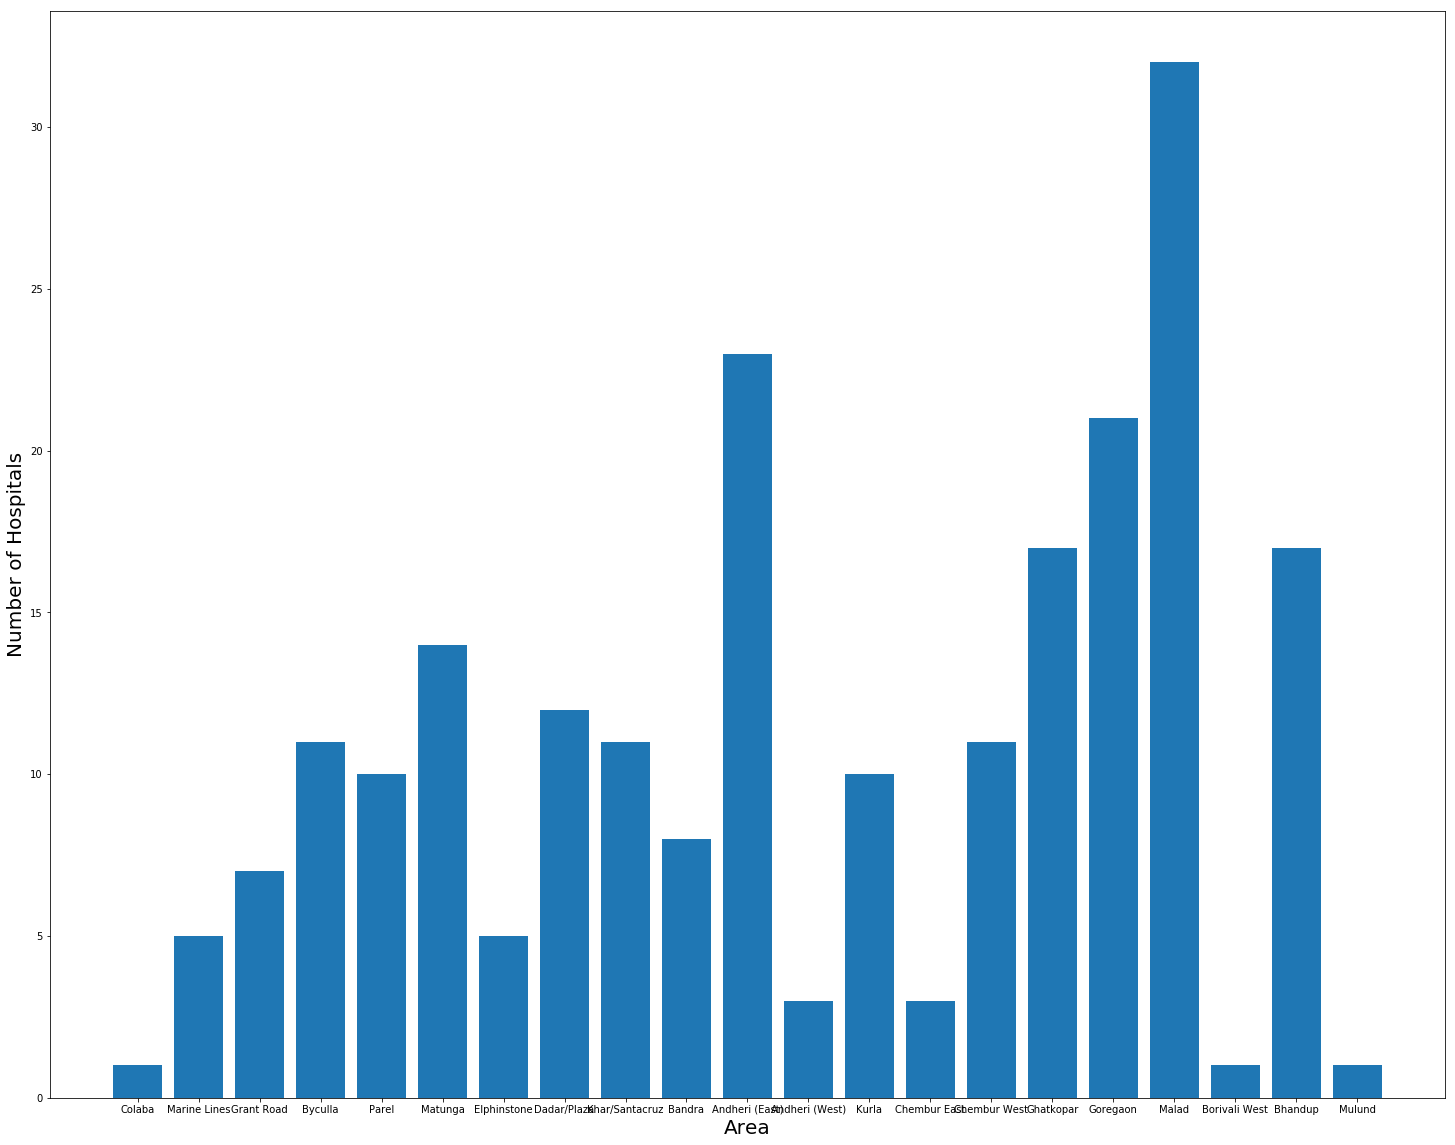

In [44]:
plt.figure(figsize=(25,20))
plt.xlabel("Area", fontsize=20)
plt.ylabel("Number of Hospitals", fontsize=20)
plt.bar(mumbai_locality_population.Area.tolist(), mumbai_locality_population.iloc[:, 5]
.tolist())

#### Plotting colour coded localities on the map
Colours are coded based on the following parameters:
1. Population Density
2. Population
3. Number of government hospitals

#### Red:
This colour implies that considering the parameters, number of Hospitals are very less than the required count. Requires immediate attention, high priority.

#### Orange:
This colour implies that considering the parameters, number of Hospitals are less than the required count. Requires planned attention in the near future, medium priority.

#### Yellow:
This colour implies that considering the parameters, number of Hospitals are very close to the required count. Will require attention in the future, low priority.

#### Green:
This colour implies that considering the parameters, number of Hospitals are higher than the required count. Does not require attention for sometime, least priority.

In [45]:
mumbai_map = folium.Map(location = [mumbai_lat, mumbai_long], zoom_start=10)
for lat, lng, label, num, density, population in zip(mumbai_locality_population.Latitude, mumbai_locality_population.Longitude, mumbai_locality_population.Area, mumbai_locality_population.iloc[:, 5], mumbai_locality_population['Density  per Square Kilometer'], mumbai_locality_population.Population):
    if(int(density)>25000 and int(population)/int(num)>50000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='red',
            fill_color='red',
            fill_opacity=1
            ).add_to(mumbai_map)
    elif(int(density)>25000 and int(population)/int(num)<50000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='green',
            fill_color='green',
            fill_opacity=1
            ).add_to(mumbai_map)
    elif(int(density)<25000 and int(population)/int(num)>25000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='orange',
            fill_color='orange',
            fill_opacity=1
            ).add_to(mumbai_map)
    elif(int(density)<25000 and int(population)/int(num)<25000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='green',
            fill_color='green',
            fill_opacity=1,
            ).add_to(mumbai_map)
    else:
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='yellow',
            fill_color='yellow',
            fill_opacity=1
            ).add_to(mumbai_map)
    print(lat, lng, label)
mumbai_map

18.915091 72.8259691 Colaba
18.9456701 72.823781 Marine Lines
18.9644472 72.8135727 Grant Road
18.9766219 72.8327936 Byculla
19.0094817 72.8376614 Parel
19.0274356 72.8501467 Matunga
18.9479384 72.8406448 Elphinstone
19.019282 72.8428757 Dadar/Plaza
19.0736276 72.8340726 Khar/Santacruz
19.0549792 72.8402203 Bandra
19.1158835 72.854202 Andheri (East)
19.1172495 72.833968 Andheri (West)
19.0652797 72.8793805 Kurla
19.0460658 72.8954733 Chembur East
19.0571098 72.8993875 Chembur West
19.0859539 72.9082381 Ghatkopar
19.1647526 72.8500176 Goregaon
19.1867193 72.8485884 Malad
19.2294561 72.8479905 Borivali West
19.1438684 72.9384327 Bhandup
19.1722904 72.9564695 Mulund


Displaying screenshot of the map, as map might not be displayed on GitHub

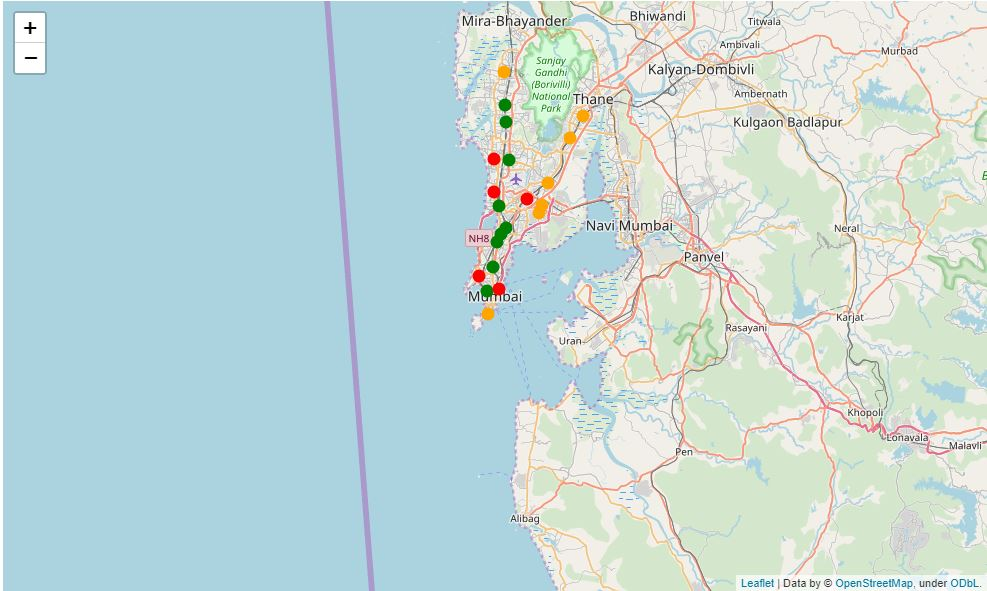

In [46]:
Image(filename='C:/Users/akash/Desktop/GitUpdate/Mumbai_Govt_Hosp_Analysis.jpg')

In [47]:
malad_coords = geolocator.geocode('Malad, Mumbai')
malad_lat = malad_coords.latitude
malad_long = malad_coords.longitude
print(malad_lat, malad_long)

19.1867193 72.8485884


In [48]:
search_query = 'Hospital'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit=50&radius=2000'.format(CLIENT_ID, CLIENT_SECRET, malad_lat, malad_long, VERSION, search_query)

Using foursquare api to get data about hospitals for a locality

In [49]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e72268e83525f001b2c35d7'},
 'response': {'venues': [{'id': '4d83582d50913704b252665b',
    'name': 'Sanjeevani Hospital',
    'location': {'address': 'Rani Sati Marg, Malad (E)',
     'lat': 19.184664761405397,
     'lng': 72.85292874045913,
     'labeledLatLngs': [{'label': 'display',
       'lat': 19.184664761405397,
       'lng': 72.85292874045913}],
     'distance': 510,
     'cc': 'IN',
     'city': 'Mumbai',
     'state': 'Mahārāshtra',
     'country': 'India',
     'formattedAddress': ['Rani Sati Marg, Malad (E)',
      'Mumbai',
      'Mahārāshtra',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1584539327',
    'hasPerk': False},
   {'id': '4cbeef5000d83704a385405c',
    'n

Structuring the response recieved from Foursquare into a Dataframe.

In [50]:
from pandas.io.json import json_normalize
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4d83582d50913704b252665b,"Rani Sati Marg, Malad (E)",IN,Mumbai,India,NaN,510,"[Rani Sati Marg, Malad (E), Mumbai, Mahārāshtr...","[{'label': 'display', 'lat': 19.18466476140539...",19.184665,72.852929,NaN,NaN,Mahārāshtra,Sanjeevani Hospital,v-1584539327
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4cbeef5000d83704a385405c,Tank Lane,IN,Mumbai,India,NaN,1813,"[Tank Lane, Mumbai 400064, Mahārāshtra, India]","[{'label': 'display', 'lat': 19.19900086811246...",19.199001,72.837254,NaN,400064,Mahārāshtra,Surana Hospital,v-1584539327
2,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4ef5cf0e2c5b0445ff7e0368,NaN,IN,NaN,India,NaN,195,[India],"[{'label': 'display', 'lat': 19.18608213169918...",19.186082,72.846860,NaN,NaN,NaN,gada hospital,v-1584539327
3,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4e70bbbac65b340cde87ca4a,"Ground Floor, Shree Mira Co Op Hsg Society",IN,Mumbai,India,"Akurli Road, Nr Big Bazaar, Kandivali East",2011,"[Ground Floor, Shree Mira Co Op Hsg Society (A...","[{'label': 'display', 'lat': 19.20193710700507...",19.201937,72.858903,NaN,400101,Mahārāshtra,Sancheti Hospital,v-1584539327
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4ec22993b8f7963bcec2a6c4,Malad (E),IN,NaN,India,NaN,376,"[Malad (E), India]","[{'label': 'display', 'lat': 19.18987790583219...",19.189878,72.849860,NaN,NaN,NaN,Suchak Hospital,v-1584539327


In [51]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        if('Hospital' in categories_list):
            return 'Hospital'
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sanjeevani Hospital,Hospital,"Rani Sati Marg, Malad (E)",IN,Mumbai,India,NaN,510,"[Rani Sati Marg, Malad (E), Mumbai, Mahārāshtr...","[{'label': 'display', 'lat': 19.18466476140539...",19.184665,72.852929,NaN,NaN,Mahārāshtra,4d83582d50913704b252665b
1,Surana Hospital,Hospital,Tank Lane,IN,Mumbai,India,NaN,1813,"[Tank Lane, Mumbai 400064, Mahārāshtra, India]","[{'label': 'display', 'lat': 19.19900086811246...",19.199001,72.837254,NaN,400064,Mahārāshtra,4cbeef5000d83704a385405c
2,gada hospital,Hospital,NaN,IN,NaN,India,NaN,195,[India],"[{'label': 'display', 'lat': 19.18608213169918...",19.186082,72.846860,NaN,NaN,NaN,4ef5cf0e2c5b0445ff7e0368
3,Sancheti Hospital,Hospital,"Ground Floor, Shree Mira Co Op Hsg Society",IN,Mumbai,India,"Akurli Road, Nr Big Bazaar, Kandivali East",2011,"[Ground Floor, Shree Mira Co Op Hsg Society (A...","[{'label': 'display', 'lat': 19.20193710700507...",19.201937,72.858903,NaN,400101,Mahārāshtra,4e70bbbac65b340cde87ca4a
4,Suchak Hospital,Hospital,Malad (E),IN,NaN,India,NaN,376,"[Malad (E), India]","[{'label': 'display', 'lat': 19.18987790583219...",19.189878,72.849860,NaN,NaN,NaN,4ec22993b8f7963bcec2a6c4
5,Elite Eye Hospital & Laser Centre,Hospital,"3rd floor, Dattani Chambers, S. V. Road, Malad...",IN,Mumbai,India,NaN,253,"[3rd floor, Dattani Chambers, S. V. Road, Mala...","[{'label': 'display', 'lat': 19.18491710075186...",19.184917,72.847118,NaN,400064,Mahārāshtra,541d4839498e78ca087902ef
6,Elite eye Hospital,Medical Center,"3rd Floor, near Kotak Mahindra bank",IN,Mumbai,India,s.v. road,451,"[3rd Floor, near Kotak Mahindra bank (s.v. roa...","[{'label': 'display', 'lat': 19.18522187379489...",19.185222,72.844598,NaN,400095,Mahārāshtra,51260c62e4b0022f90597b4d
7,Agrawal Hospital,Hospital,"Agrawal Clinic, 49",IN,Mumbai,India,"Daftary Road, Malad East",482,"[Agrawal Clinic, 49 (Daftary Road, Malad East)...","[{'label': 'display', 'lat': 19.188638, 'lng':...",19.188638,72.852702,NaN,400097,Mahārāshtra,580f809938fafbe91528fb62
8,Gariba Hospital,Hospital,NaN,IN,NaN,India,NaN,498,[India],"[{'label': 'display', 'lat': 19.18828585060275...",19.188286,72.844148,NaN,NaN,NaN,4c4b3aaf5609c9b64414da90
9,Ashoka Hospital,Hospital,Ashoka Palace,IN,Mumbai,India,Malad East,722,"[Ashoka Palace (Malad East), Mumbai, Mahārāsht...","[{'label': 'display', 'lat': 19.18221542749482...",19.182215,72.853541,NaN,NaN,Mahārāshtra,4fd97e54e4b0ea76a6a9c056


Calculating the count of Government and Private Hospitals from the data recieved via Foursquare.

In [52]:
count = 0
for cat, name in zip(dataframe_filtered.categories, dataframe_filtered.name):
    if cat in ('Hospital', 'Medical Center') or 'hospital' in name.lower():
        count+=1
print(count)

41


In [53]:
print(len(dataframe_filtered.categories.tolist()))

42


#### Using Foursquare to retrieve Hospital data for each locality.

Note: As the calls made to Foursquare api are from a Developer account, the number of responses are limited to 50 only.
Considering this as actual number of hospitals further analysis has been made.

In [54]:
number_of_private_and_govt_hospitals = []
search_query = 'Hospital'
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']

    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
for area, lat, lng in zip(mumbai_locality_population.Area, mumbai_locality_population.Latitude, mumbai_locality_population.Longitude):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit=50&radius=2000'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query)
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    #dataframe2.head()
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

    #dataframe_filtered2
    
    count = 0
    for cat, name in zip(dataframe_filtered2.categories, dataframe_filtered2.name):
        if cat in ('Hospital', 'Medical Center') or 'hospital' in name.lower():
            count+=1
    #print(area, lat, lng)
    number_of_private_and_govt_hospitals.append(count)
    
number_of_private_and_govt_hospitals
    

C:\Users\akash\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


[2,
 42,
 50,
 41,
 46,
 42,
 28,
 50,
 32,
 30,
 50,
 50,
 33,
 36,
 33,
 27,
 24,
 41,
 39,
 15,
 42]

Adding the count of hospitals retrieved from foursquare to our Dataframe.

In [55]:
mumbai_locality_population['Number of Govt. and Private Hospitals (in 2km radius via Foursquare)'] = number_of_private_and_govt_hospitals
mumbai_locality_population

,Area,Population,Density per Square Kilometer,Latitude,Longitude,Number_of_Govt._Hospitals,Number of Govt. and Private Hospitals (in 2km radius via Foursquare)
0,Colaba,210847,16868,18.915091,72.825969,1,2
1,Marine Lines,202922,114001,18.945670,72.823781,5,42
2,Grant Road,382841,57744,18.964447,72.813573,7,50
3,Byculla,440335,59505,18.976622,72.832794,11,41
4,Parel,396122,28294,19.009482,72.837661,10,46
5,Matunga,524393,40400,19.027436,72.850147,14,42
6,Elphinstone,457931,45793,18.947938,72.840645,5,28
7,Dadar/Plaza,582007,64168,19.019282,72.842876,12,50
8,Khar/Santacruz,580835,42929,19.073628,72.834073,11,32
9,Bandra,337391,29211,19.054979,72.840220,8,30


Calculating difference between count of Govt. + Private Hospitals and Govt. Hospitals only.
Adding it to our dataframe

In [56]:
diff_count = []
for gov_count, gen_count in zip(mumbai_locality_population.iloc[:, 5], mumbai_locality_population.iloc[:, 6]):
    diff_count.append(gen_count - 2*gov_count)
mumbai_locality_population['Generic Difference between count of Govt. and Private Hospitals'] = diff_count
mumbai_locality_population

,Area,Population,Density per Square Kilometer,Latitude,Longitude,Number_of_Govt._Hospitals,Number of Govt. and Private Hospitals (in 2km radius via Foursquare),Generic Difference between count of Govt. and Private Hospitals
0,Colaba,210847,16868,18.915091,72.825969,1,2,0
1,Marine Lines,202922,114001,18.945670,72.823781,5,42,32
2,Grant Road,382841,57744,18.964447,72.813573,7,50,36
3,Byculla,440335,59505,18.976622,72.832794,11,41,19
4,Parel,396122,28294,19.009482,72.837661,10,46,26
5,Matunga,524393,40400,19.027436,72.850147,14,42,14
6,Elphinstone,457931,45793,18.947938,72.840645,5,28,18
7,Dadar/Plaza,582007,64168,19.019282,72.842876,12,50,26
8,Khar/Santacruz,580835,42929,19.073628,72.834073,11,32,10
9,Bandra,337391,29211,19.054979,72.840220,8,30,14


#### Plotting colour coded localities on the map
Colours are coded based on the following parameters:
1. Population Density
2. Population
3. Number of government and private hospitals

#### Red:
This colour implies that considering the parameters, number of Hospitals are very less than the required count. Requires immediate attention, high priority.

#### Orange:
This colour implies that considering the parameters, number of Hospitals are less than the required count. Requires planned attention in the near future, medium priority.

#### Yellow:
This colour implies that considering the parameters, number of Hospitals are very close to the required count. Will require attention in the future, low priority.

#### Green:
This colour implies that considering the parameters, number of Hospitals are higher than the required count. Does not require attention for sometime, least priority.

In [57]:
mumbai_map2 = folium.Map(location = [mumbai_lat, mumbai_long], zoom_start=10)
for lat, lng, label, num, density, population in zip(mumbai_locality_population.Latitude, mumbai_locality_population.Longitude, mumbai_locality_population.Area, mumbai_locality_population.iloc[:, 6], mumbai_locality_population['Density  per Square Kilometer'], mumbai_locality_population.Population):

    if(int(density)>25000 and int(population)/int(num)>50000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='red',
            fill_color='red',
            fill_opacity=1
            ).add_to(mumbai_map2)
    elif(int(density)>25000 and int(population)/int(num)<50000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='green',
            fill_color='green',
            fill_opacity=1
            ).add_to(mumbai_map2)
    elif(int(density)<25000 and int(population)/int(num)>25000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='orange',
            fill_color='orange',
            fill_opacity=1
            ).add_to(mumbai_map2)
    elif(int(density)<25000 and int(population)/int(num)<25000):
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='green',
            fill_color='green',
            fill_opacity=1,
            ).add_to(mumbai_map2)
    else:
        folium.CircleMarker(
            location=[lat, lng],
            radius=5,
            popup=label+" "+"( "+str(num)+" )",
            fill=True,
            color='yellow',
            fill_color='yellow',
            fill_opacity=1
            ).add_to(mumbai_map2)
    #print(lat, lng, label)
        
mumbai_map2

Displaying screenshot of the map, as map might not be displayed on GitHub

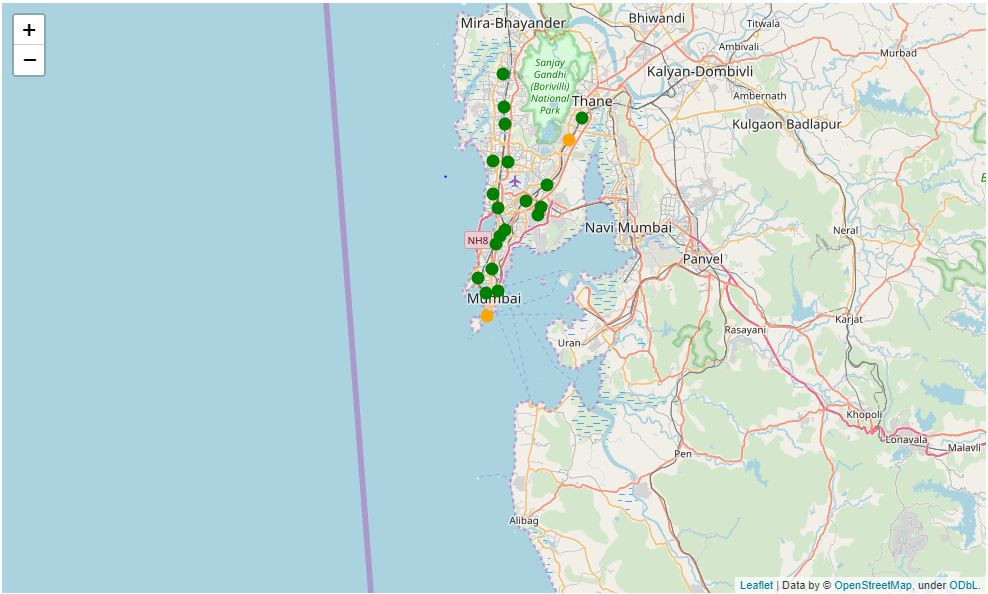

In [58]:
Image(filename='C:/Users/akash/Desktop/GitUpdate/Mumbai_Govt_and_Private_Hosp_Analysis.jpg')

#### Plotting colour coded localities on the map
Colours are coded based on the following parameters:
1. Population Density
2. Population
3. Difference between Number of government+private hospitals and number of govt. Hospitals

#### Red:
This colour implies that considering the parameters, number of Govt. Hospitals are very less than the required count. Requires immediate attention, high priority.

#### Orange:
This colour implies that considering the parameters, number of Govt. Hospitals are less than the required count. Requires planned attention in the near future, medium priority.

#### Yellow:
This colour implies that considering the parameters, number of Govt. Hospitals are very close to the required count. Will require attention in the future, low priority.

#### Green:
This colour implies that considering the parameters, number of Govt. Hospitals are higher than the required count. Does not require attention for sometime, least priority.

In [59]:
mumbai_map3 = folium.Map(location = [mumbai_lat, mumbai_long], zoom_start=10)
for lat, lng, label, num, density, population in zip(mumbai_locality_population.Latitude, mumbai_locality_population.Longitude, mumbai_locality_population.Area, mumbai_locality_population.iloc[:, 7], mumbai_locality_population['Density  per Square Kilometer'], mumbai_locality_population.Population):
    try:
        if(int(density)>25000 and int(population)/int(num)>50000):
            folium.CircleMarker(
                location=[lat, lng],
                radius=5,
                popup=label+" "+"( "+str(num)+" )",
                fill=True,
                color='green',
                fill_color='green',
                fill_opacity=1
                ).add_to(mumbai_map3)
        elif(int(density)>25000 and int(population)/int(num)<50000):
            folium.CircleMarker(
                location=[lat, lng],
                radius=5,
                popup=label+" "+"( "+str(num)+" )",
                fill=True,
                color='red',
                fill_color='red',
                fill_opacity=1
                ).add_to(mumbai_map3)
        elif(int(density)<25000 and int(population)/int(num)>25000):
            folium.CircleMarker(
                location=[lat, lng],
                radius=5,
                popup=label+" "+"( "+str(num)+" )",
                fill=True,
                color='yellow',
                fill_color='yellow',
                fill_opacity=1
                ).add_to(mumbai_map3)
        elif(int(density)<25000 and int(population)/int(num)<25000):
            folium.CircleMarker(
                location=[lat, lng],
                radius=5,
                popup=label+" "+"( "+str(num)+" )",
                fill=True,
                color='orange',
                fill_color='orange',
                fill_opacity=1,
                ).add_to(mumbai_map3)
        else:
            folium.CircleMarker(
                location=[lat, lng],
                radius=5,
                popup=label+" "+"( "+str(num)+" )",
                fill=True,
                color='orange',
                fill_color='orange',
                fill_opacity=1
                ).add_to(mumbai_map3)
    except:
        folium.CircleMarker(
                location=[lat, lng],
                radius=5,
                popup=label+" "+"( "+str(num)+" )",
                fill=True,
                color='green',
                fill_color='green',
                fill_opacity=1
                ).add_to(mumbai_map3)
    #print(lat, lng, label)
mumbai_map3

Displaying screenshot of the map, as map might not be displayed on GitHub

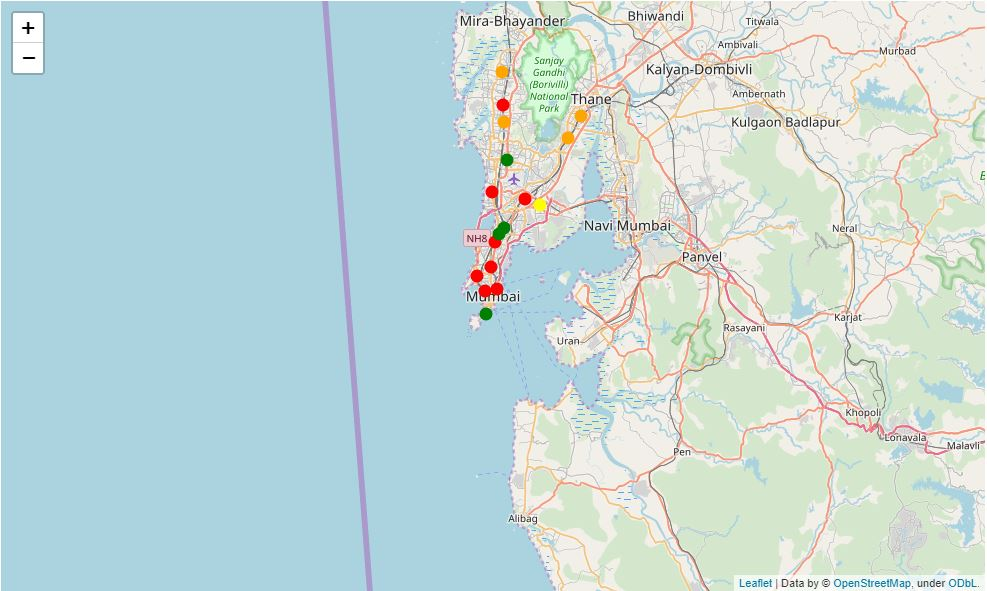

In [60]:
Image(filename='C:/Users/akash/Desktop/GitUpdate/Mumbai_Govt_comparison_with_Private_Hosp_Analysis.jpg')